# Programs are like functions

## Programs can have parameters

Now that you know how to write programs you are familiar with functions. This "special" chapter is gonna give you some advanced notions about programs in linux environment.

In linux environment you can really see programs as functions. Just like functions they can have parameters and outputs.
(They also have input, which is slightly different than parameters, we will see that a bit later).

To run a program in linux it is very simple: just open a terminal, go to the repertory where your program is installed, then type the name of the program followed by its parameters.

my_program param1 param2

Unless functions in python you don't type parenthesis '()' or coma ',' around the parameters.

## Customize what your program is doing

But what is the point of giving parameters to program execution ? In windows we just click the icon then the program runs. Is linux more complicated ?

Answer is no, if the program can run without parameters it will run.
Moreover I have good news for you, you already used a program with parameters many times.
This program has a familiar name: 'ls'

Yes, "ls" is a program just like all the other linux command.
Just like all other linux built-in programs it is located in /bin/
Don't believe me, just try to find it yourself.

You also already know the parameters ls expects: it can be "the repertory" you want to list, or "options" for the listing.
The documentation of "ls" command says:

So "ls" can run perfectly without parameters, but you can customize what it does by giving it options and parameters.

An other example that you probably know: jupyter. You are currently running a jupyter notebook. The command line you typed might have been this:

This is an execution of the program called "jupyter" it has two parameters, the first parameter 'notebook' tells jupyter to run a notebook, the second parameter tells it "which file contains your notebook".

## Read the F** manual

As you can see the parameters for a program are the way to tell your program what it needs for its execution because sometimes it makes sense.

For instance you can pass a parameter "notebook" to "jupyter" because that makes sense for jupyter. However if you give the same parameter "notebook" to the command "ls", it will thing you are talking about some directory name.

The point is there is no black magic ongoing here (I will show you black magic as a bonus at the end of this chapter). The program needs to be "expecting" a parameter and "know what to do about this". 
If you are a developper writing down some program you will need to write in your code all the behaviour of your program for any parameter it is able to process.

What if you are using someone else's program ?
This is what documentation is meant for. Every program distributed for other people to use it should have a documentation. In linux we talk about "the manual".

Every linux command has a manual entry describing what it is doing and listing all the possible parameters you may give to that command.

Any decent linux environment has a command called "man". It has nothing to do with anything manly. "man" is just short for manual.

Go on, you may try it with ls ! Just type :

In [2]:
man ls

There is a short description about what the command do. And a description about how to use it like this:
 ls [OPTION]... [FILE]...
 
This describes how you should type the command. First type "ls" then you give (or not) OPTIONs then you give (or not) FILEs.
The "..." means 0 1 or many. Meaning you can provide zero one or more options as first parameter.

Options usually start with a dash "-" that is how you recognize they are options.
Let's say inside parameters there is a distinction between an option and a parameter.

If you scroll down you will see a list of any possible option that you might want to give to the ls command, and if relevant you will also have "arguments" for option.
Example:

              
Means that the option -I can also be called --ignore, takes an argument PATTERN which tels ls not to list the files whose name contains the given PATTERN.

Note that PATTERN is not between brackets [], which means that you have to give a value to that parameter.

I really encourage you to check the manual every time you see a command you never seen before. All the in-built commands in linux have a manual entry. And sometimes you may find options allowing you to do things that would much more complicated to do otherwise.

# Linux environment

## Environment variables

Have you noticed that when you write your own program in some folder, then open a new terminal, you cannot run your program by just typing its name. You need to go to the folder where your program is located before you can run it.

But some programs look like exceptions, all the linux commands located in /bin are exceptions : you can run them from any directory.
But there are others exceptions, jupyter may be one of them.

Here is the secret: the reason why they are exceptions.
In your terminal type:


In [ ]:
echo $PATH

This command runs the program echo with the parameter $PATH, in short it means "display the value of the variable PATH".
The output of this command should be a list of directories separated by ':'. I bet the jupyter program is in one of these directories. How come ?

PATH is a special environment variable. "environment variable" is a fancy expression just to say that is is a variable defined in your terminal environment.

You can create your own variables using the command just like this:

In [3]:
my_variable="test"

Then you can print the value of your variable using echo

In [ ]:
%echo $my_variable

You need to add the '\$' because writing down "echo my_variables" means something else:
 - *echo still means display*, but if you don't put a '$' in front your variable name it will write "my_variable" instead of your varriable value (here it is "test").

PATH is just another environment variable, but it has a special property: 
- "When you type a command your terminal does not know, it will search all the directories listed in PATH for a program with that name."

# Pipes

Now we start dealing with serious stuff. Pipes are such a powerful feature in linux that it would be shame you never seen them in action.

If I had to say in one sentence what pipes do I would say: they connect a program (or a command, now you know it is the same thing) output with the next program input.

I said in the begining to avoid confusing parameters and input. Here you will know why.

I did not tell you the whole truth about the shape of a command running a program: here are the details I hid from your innocent eyes:

(input >>) my_program param1 param2 (>> output) (> return value)

Let's check it step by step. You have an input stream, an output stream and a return value.

## output stream

Actually you already know about the "output". You can see it as the "logs" of your program. It is also the place where the command ls writes the directory you are listing.

By default the "output" of a program is redirected to the terminal, that is how you can see ls listing the files in the current directory.

We call it a stream, because it is living as long as the program lives. Whenever the program wants to output something it will be "added in the flow".

## return value

The return value is a "status" of the program at the end of its execution. In normal execution if everything is fine by convention programs usually return 0 (but they don't have to).
Once again you can check the manual to see what is the meaning of the RETURN value of the command you use.

It is not often useful to get this return value, the casual use case is when you want to ensure that previous command executed without errors.

The terminal stores the return value of last command execution in the environment variable $?.

You can try ! Type:

In [ ]:
 ls 

In [ ]:
echo $? #should be 0

In [ ]:
ls some_repertory_or_file_that_does_not_exist

In [ ]:
echo $? #should be something else other that 0

## input stream 

Last but not least I wanna tell you about the input stream. Just like output stream, input stream lives as long as the program lives.
There are many ways in python to read the input stream. 
A common use cas is when you prompt something to the user using the python built-in function "input".

I will show you some black magic about that later on. But for now the point is the input stream is available for the program during its whole execution.

However keep in mind that the program will not be interrupted by anything enterning the input stream.
The program has to actively read the input stream if it is interested in what's in it (calling input method is an example of a program reading input stream).

Now let's see a very powerful use case !

## let's pipe !

One the first thing most linux command do when they start is : "reading the input stream". In many cases they use the data in the input stream the exact same way they would read it if it were parameters.
But often they interpret input stream and parameters a different way. 

These are not thing you can just "guess" if you don't know because they depend on what's inside the program. But normally the information you need is in the manual!

Let's see some examples:


In [ ]:
pwd | cat

The thing you should be paying attention to is this sign: "|".

The linux developers thought the vertical bar has the shape of a pipe, so they chose it to represent pipes.
What pipes mean ?

Now that you know about output and input streams you can understand: 
"the pipe connects the output stream of the command1 to the input stream of command2"

On that example above the pwd command will write the current directory on its output stream.
Then cat starts check its parameters, and doesn't find any. 
Since it does not find parameters the manual says:
    "With no FILE, or when FILE is -, read standard input."
    
Which means it is just gonna print out what it sees on its input.

Ok, that was a bad example, the cat here is just useless, I have the same overall output with just typing "pwd". But that was the easy example, let's see a more interesting one.

Imagine you want to search all your jupyter notebooks for any sentence containing the words : "black magic". You want to know if there is black magic somewhere there.
Check that up :

Cool ? Is it ? 
First command: 

In [ ]:
cat *.ipynb #means : "generate an output which is the concatenated content of all files whose name ends with .ipynb"

# Enter the black depths of linux

If you are afraid of the consequences of practising black whichcraft, please leave this chapter. I am not responsible of the consequences of what you are gonna do with this knowledge.

## Programs vs process

Do you know the difference between a program and a process ? That is a tricky question but the answer is easy to understand: 
 - a programm is a code and a corresponding binary
 - a process is a program being executed
 
You can run a program many times at the same time, you still gonna have "one program", but there will be as many process running your program as the number of times the program was started.

The linux operating system creates processes all the time. For each process in your machine Linux attributes a unique process id.

With a linux terminal, you can see the process running on your system using the command ps.
Try with options.
- ps -ef 
- ps ax


It is the same but shaped differently. Check the man for more information.


As you can see there is a whole jungle of process.
Now are expert in pipes, you can filter that, for instance try to display or the jupyter process using

## In Linux: everything is a file

Let's go deeper in the black magic... You are gonna need to open two terminals.
In the first terminal run a python command prompter.

The python command prompter you just ran is a process like all the others. 
I want the process id.

On the python command line run the two following commands:
- import os
- os.getpid()

It should look like this:


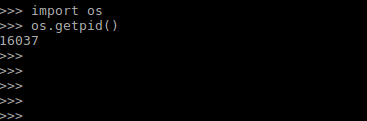

Ok, now have a look as your /proc filesystem:

In [7]:
ls /proc

1/      13911/  1653/  1890/   21941/  30/   923/         kpageflags
10/     13912/  1654/  1896/   22/     31/   931/         loadavg
101/    13915/  1655/  19/     22140/  32/   95/          locks
1015/   14/     1656/  191/    2218/   34/   96/          mdstat
1019/   1407/   1657/  192/    2221/   35/   975/         meminfo
102/    14101/  1658/  1921/   2224/   36/   976/         misc
103/    1418/   1659/  194/    22248/  37/   98/          modules
104/    1430/   1660/  1941/   22249/  38/   99/          mounts@
105/    14541/  1661/  1943/   2226/   39/   998/         mtrr
106/    1455/   1686/  195/    2236/   4/    999/         net@
1072/   1458/   1709/  1964/   22394/  40/   acpi/        pagetypeinfo
10850/  1462/   1716/  19709/  2253/   403/  asound/      partitions
10861/  1476/   1725/  19801/  2266/   41/   buddyinfo    sched_debug
10862/  1482/   1728/  2/      22723/  42/   bus/         schedstat
11/     1486/   1730/  20/     2273/   43/   cgroups      scsi/
1107/  

As you can see there are a lot of repertories whose name is a number. If you take a close look at this, these number are an exaustive list of all the ids of the process currently running in your environment.

Let's go to the folder corresponding to you python console: 

You have a lot of stuf going on there. But there is one repertory I wanna show you. Its name is "fd".

cd /proc/[your python console proc id]/fd
ls

Normally you have at least three files there. They got simple and dirty names: "0 1 2".

## Oh no ! Don't do this !

Remember this chapter name: "In Linux: everything is a file".
This is the truth. As I just shown you, process are directories (which is a special kind of file).
And now I am gonna tell you an other secret: **"input stream" and "output stream" are also files !** 

And I have got one more revelation: you are watching these files right in front your bare eyes !
- 0 : this is the standard input of your process
- 1 : this is the standard output
- 2 : this is the "standard error" it is just like "standard ouput" expect programmers use this stream to write error outputs

And now if you are brave enough, I can show you how to hack this ! I am not responsible of the consequences...

The '>>' operator is something I haven't told you about, it is like pipe "|" execpt that instead of redirecting the output to an other command input, it redirects that same to the end of a file.


Ok, now have a look at your python console.... Tada !!! Now you are a wizard ! ;)

When playing with this you may notice some weird details. I let you make your discovering. Keep in mind that they are your punishment for doing black magic ;)